# <center> BIGDATA X YONSEI CAMPUS </center>
### <center> 키워드 분석 및 문서 분석 </center>
#### <center> 키워드 분석: 인기검색어 </center>
---------------------------
#### <div style="text-align: right"> 손근영 </div>

## 1. Keyword Analysis - 인기 검색어
### Motivation
* 사용자들은 액션을 귀찮아함
* 검색어 입력은 피곤한 일
 * 스마트폰에서 키보드 입력은 매우 힘든 일
* 사용자는 자신이 무엇을 찾으려하는지 모름
 * 대부분의 사용자들은 인터넷을 이용할 때 분명한 목적이 있지 않음
 * 대부분의 사용자는 big head/log tail 법칙에 따라 정보를 소비함
 * 최근 사용자들은 정보를 능동적으로 소비하지 않고 수동적으로 주입 당함

## 1. Keyword Analysis - 인기 검색어
### Key Idea
* 어째뜬 검색은 발생되고 검색 노출 로그는 생성됨
 * 어떻게 하면 더욱 유익하게 사용할 수 있을까?
 * 어떻게 하면 무엇을 찾을지 모르는, 검색어 입력을 귀찮아하는 사용자에게 검색을 이용하게 할 것인가?
* 많이 발생한 빈도의 키워드를 5~10분마다 저장하고 있다가 사용자에게 노출해주면?

## 2. 인기 검색어의 서비스 화면
<center><img src='img/01_12.png' height=100% width=100%></center>

## 3. 인기 검색어의 가치
* 사용자는 오늘/지금 이순간 무슨일이 일어났는지 모름
 * 뉴스/매체는 자신들이 알고 있는 정보를 사용자에게 전달하길 원함 (PV 증대 목적)
 * 정보에 빠른 사용자들은 자신이 얻은 정보를 타인에게 전달함 (by SNS, 카카오톡)
* 정보가 퍼지면 관련 검색어들이 급속도로 재생산되어 재검색 됨
 * 관련 검색어들은 이전과는 전혀 다른 속도로 상승함
* 많은 사용자들은 이러한 정보에 관심이 있을 수 있음
 * 새로운 사용자도 해당 정보의 소비에 영향을 끼쳐 검색량이 증가함
 -------------------------
* 검색량이 증가하면?
 * PV 상승
 * 이용자의 의도가 더욱 더 log안에 저장됨
 * 해당 사용자의 행태가 저정됨


## 4. 인기검색어 방식 구상
### 로그 형태

<center><img src='img/01_13.png' height=70% width=70%></center>

### 알고리즘
* 검색 로그를 line by line으로 분리
* line을 \t 기준으로 분리
* 분리된 데이터에서 '시간', '검색어'를 획득
* 5분 동안의 윈도우 사이즈에서 검색어 개수를 집계함
* 내림차순으로 정렬 후 특정 개수를 노출 후 5분마다 재집계함

## 5. 인기검색어 방식 설명
### 데이터 정의
* window 사이즈 (5분)마다 주어진 형식의 log가 저장된다고 가정
* 호출 때마다 다음 5분 데이터가 출력됨

<center><img src='img/02_01.png' height=100% width=100%></center>

### 키워드 집계 구현
* 주어진 5분의 데이터에세 키워드를 집계, Rank 컬럼 부여
* 내림차순 정렬 후 특정 개수로 자르면 네이버식 인기검색어

<center><img src='img/02_02.png' height=40% width=40%></center>

### 순위 상승/하락 구현
* 순위 하락/상승을 구현하려면?
 * 어떤 검색어의 변경된 순위 수치를 +/-로 표현하는 함수를 $step(검색어)$라고 가정
 * 5분전의 어떤 검색어의 순위를 표현하는 함수를 $oldRank(검색어)$라고 가정
 * 현재의 어떤 검색어의 순위를 표현하는 함수를 $curRank(검색어)$라고 가정
$$ Step(검색어) = oldRank(검색어) - curRank(검색어) \nonumber $$

<center><img src='img/02_03.png' height=100% width=100%></center>

## 6. 실습

### 1) 데이터 정제
* 대부분의 로그 데이터는 깨끗하지 않고 여러 노이즈가 섞여 있다
* 다양한 방법을 통하여 클랜징을 할 필요성에 있다

In [1]:
import pandas as pd
df = pd.read_csv('data/sample_search_log.txt',
                 sep='\t',
                 header=None,
                 names = ['date', 'id', 'keyword', 'result'])
df.head(5)

,date,id,keyword,result
0,20111103-171144,9c4d360d316e5792e5a37b0e0a1e8b82,지하철노선도,secret
1,20111103-171302,12e994b978d42d93d4347d89a2519d0f,서울시립대 반값등록금,secret
2,20111103-170329,0c88a61cb02801ac21747a9b02e57300,벼룩시장,secret
3,20111103-170612,d21dad3d5c8c6bb2a5271faf95db31db,영화다운,secret
4,20111103-171437,7d228d8b281447909b0bfa89b88b06dc,수지 방,secret


In [2]:
#데이터 기본 통계를 확인
df.describe()

,date,id,keyword,result
count,572448,572408,572426,572422
unique,78477,326687,307871,8
top,20111103-171235,1921ec67ed6c4bb1a13b028ee6dbd111,여자아이돌 대마초,secret
freq,27,374,5811,572415


In [3]:
#date 형식이 time 형식인 것을 확인할 수 있으니 date type으로 변경해보자
df['date'] = df.date.apply(lambda x: pd.datetime.strptime(x, '%Y%m%d-%H%M%S'))

ValueError: time data 'ns.e-bizs.net' does not match format '%Y%m%d-%H%M%S'

In [4]:
#파싱이 안되는 여러원인이 있을 수 있으나 알려진 형식에 맞지 않는 date 형태가 무엇이 있었는지 확인해보자
df[df.date.str.len() != 15][:5]

,date,id,keyword,result
26169,ns.e-bizs.net,NaN,NaN,NaN
26170,121.78.246.24,secret,NaN,NaN
29311,NaN,secret,NaN,NaN
34791,Industrial facilities and distributors stage...,NaN,NaN,NaN
34792,Carcass meat shipped to retailers and distri...,secret,NaN,NaN


In [5]:
#타임 string의 길이가 15인 것만을 남겨본 뒤 date 변환을 시도해보자
df =  df[df["date"].map(str).map(len) == 15]
df['date'] = df.date.apply(lambda x: pd.datetime.strptime(x, '%Y%m%d-%H%M%S'))

In [6]:
#데이터 기본 통계를 확인
df.describe()

,date,id,keyword,result
count,572430,572400,572426,572422
unique,78461,326686,307871,8
top,2011-11-03 17:12:35,1921ec67ed6c4bb1a13b028ee6dbd111,여자아이돌 대마초,secret
freq,27,374,5811,572415
first,2011-11-03 00:00:00,NaN,NaN,NaN
last,2011-11-03 23:59:59,NaN,NaN,NaN


In [7]:
#한명당 검색어를 어느정도 입력하는지 다양한 방법으로 알아볼 수 있다
grouped = df.groupby(by='id').count().sort_values(by=['keyword', 'date'], ascending=False)
grouped.head(5)

,date,keyword,result
id,,,
1921ec67ed6c4bb1a13b028ee6dbd111,374,374,374
ffe1489725ef504ef8938f2fe192f2a7,235,235,235
35b9ab5a36f3234dd26db357fd4a0dc1,169,169,169
c223710e267c997aa9e81703e560b1c3,119,119,119
e5e66a674cff71a99fab24d6ca2f82d3,91,91,91


In [8]:
# 평균적으로 1사람이 어느정도의 검색어를 입력하는지 알아볼 수 있다
print(grouped.median())
print()
print(grouped.mean())

date       1.0
keyword    1.0
result     1.0
dtype: float64

date       1.752141
keyword    1.752129
result     1.752117
dtype: float64


In [9]:
#데이터의 시작 날짜와 끝 날짜를 확인해보자
print ( df.date.min() )
print ( df.date.max() )

2011-11-03 00:00:00
2011-11-03 23:59:59


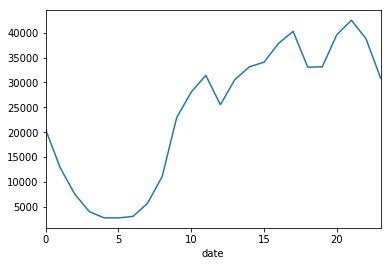

In [11]:
#날짜에 색인을 걸고 시각화를 해보자
df_index = df.set_index('date')
import matplotlib.pyplot as plt
df_index.groupby(by=df_index.index.hour)['keyword'].count().plot()
plt.show()

In [12]:
# keyword 길이에 대한 기본통계를 출력해보자
df_index.keyword.map(str).map(len).describe()

count    5.724300e+05
mean     1.182076e+01
std      2.085732e+03
min      1.000000e+00
25%      4.000000e+00
50%      6.000000e+00
75%      9.000000e+00
max      1.273532e+06
Name: keyword, dtype: float64

In [13]:
#5000 글자가 넘는 keyword들이 무엇인지 확인해보자
df_index[df_index.keyword.map(str).map(len) > 5000][:5]

,id,keyword,result
date,,,
2011-11-03 15:51:50,b63d7ad2148297ed76e07f22a68959a8,tenkiu\tsecret\n20111103-155127\t3128aca3bfbb8...,secret
2011-11-03 00:46:43,202e515f90a1dca3b567c040b24fd76c,\tsecret\n20111103-004659\t31d1a0fa320e792ba56...,secret
2011-11-03 07:51:57,31ab802e2b8176a65e45ace58c45407d,?:\tsecret\n20111103-075211\t31ab802e2b8176a65...,secret
2011-11-03 17:04:46,9daae4a26cb8145b8bcff03050d5bf07,\tsecret\n20111103-173516\tf06b3a818f82c75dc96...,secret
2011-11-03 19:08:06,6f5cdcd744ad10227f8cc783eaca0868,way back into love\tsecret\n20111103-194935\t9...,secret


In [14]:
# 지금까지 알아낸 정보를 이용해서 df를 새로 load해보자
import csv
df = pd.read_csv('data/sample_search_log.txt',
                 sep='\t',
                 header=None,
                 names = ['date', 'id', 'keyword', 'result'],
                 quoting=csv.QUOTE_NONE)
df = df[df["date"].map(str).map(len) == 15]
df['date'] = df.date.apply(lambda x: pd.datetime.strptime(x, '%Y%m%d-%H%M%S'))

In [28]:
# keyword 길이에 대한 기본통계
df.keyword.map(str).map(len).describe()

count    630712.000000
mean          6.838930
std           4.773458
min           1.000000
25%           4.000000
50%           6.000000
75%           9.000000
max         907.000000
Name: keyword, dtype: float64

In [29]:
# 길이가 100이 넘는 keyword는 무엇일까?
df[df.keyword.map(str).map(len) > 100][:5]

,date,id,keyword,result
206,2011-11-03 17:11:58,589b95e3ee1ff1e0a3d9817e7c859f52,A Boy and His HorseMike lives on a farm. There...,secret
8398,2011-11-03 08:45:33,efe31c1b24297ab2c32cdeec5fb41b2d,유빈아미안해 유빈아미안해유빈아미안해유빈아미안해유빈아미안해유빈아미안해유빈아미안해유빈아...,secret
11152,2011-11-03 23:18:56,a616d124f35d1e1c6121ed707c2d51c2,낙성비룡｣은 조선 왕실에서 향유되었던 낙선재본 소설이다. 이 작품은 영웅소설인 ｢소...,secret
31347,2011-11-03 18:35:02,52f2c3ec9ddafdd7325efa8ffa6dbcfa,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[...,secret
38694,2011-11-03 16:15:16,0c27eff8b3bafe515a6890a5c5ec8c08,[ㅔㅑㅐㅑㅔㅐ[ㅔ]-=09ㅑㅐㅐㅏㅣ[ㅏㅣㅓ;ㅏㅓㅏㅗㅇㄹㅇㅊㄴ허ㅌ32123234546...,secret


## quiz 1
- 전체 PV와 UV를 구해보자

## quiz 2
- 특정 키워드(네이버, 다음, 카카오)에 대한 PV와 UV를 구해보자

### 2) pandas를 이용한 mapReduce를 활용하지 않는 인기검색어
- 인기 검색어를 pandas를 이용하여 구현하여보자
- 인기 검색어는 windows size가 존재하는 것을 제외하면 키워드 집계와 핵심로직을 90% 이상 공유함

In [15]:
import pandas as pd

# 5분동안의 데이터가 스트림으로 지나가는 것을 시뮬레이션하는 제네레이터
def log_streamer(path, window_size = 5):
    import csv
    df = pd.read_csv(path, sep='\t', header=None, names = ['date', 'id', 'keyword', 'result'],quoting=csv.QUOTE_NONE)
    df =  df[df["date"].map(str).map(len) == 15]
    df['date'] = df.date.apply(lambda x: pd.datetime.strptime(x, '%Y%m%d-%H%M%S'))
    df = df[['date', 'id', 'keyword']]
    df = df.set_index('date').sort_index()
    
    current_timestamp = df.index[0]
    while current_timestamp < df.index[-1]:
        next_timestamp = current_timestamp + pd.DateOffset(minutes=window_size)
        window_df = df[current_timestamp:next_timestamp]
        yield window_df
        current_timestamp = next_timestamp

window_df = log_streamer('data/sample_search_log.txt')

##### 스트리밍 로그 출력
- 실제 서비스 단에서는 주어진 window 사이즈의 데이터가 실시간 혹은 파일 시스템에 주기적으로 저장됨
- 위의 상황을 모사하여, 호출하면 연속된 window 사이즈의 데이터를 순차적으로 출력하는 스트림을 생성
- next(스트림)을 호출하면 5분 단위씩의 window 사이즈의 데이터를 출력함


In [16]:
# 처음 5분의 데이터 2011-11-03 00:00:00 ~ 2011-11-03 00:05:00
next(window_df)[:5]

,id,keyword
date,,
2011-11-03,f9947bb8c91c027cd85dcb0044056885,음악이 쓰이는 예
2011-11-03,a4b49b06464597a9cd070985199bc637,한미fta
2011-11-03,93ac87adba3c3e7e0dae915701884f87,잭다니엘 로고 ai
2011-11-03,e87fa94638891f3ed8737abf368e06e5,B형성격
2011-11-03,5996de2df2b6889c7d6373e09c425c84,주걸륜


In [37]:
# 다음 5분의 데이터 2011-11-03 00:05:00 ~ 2011-11-03 00:10:00
next(window_df)[:5]

,id,keyword
date,,
2011-11-03 00:05:00,16d5c7e0a2ce331b77f1141545bec342,로마문화유적
2011-11-03 00:05:00,977dc555540ccc221abb60872121baad,독서대
2011-11-03 00:05:00,85306d646596501fb4f16bd816794ef4,소이 왕따
2011-11-03 00:05:00,69dfa95a68ce8703bdd9ad1fd8418ef3,박명수 부인 재혼
2011-11-03 00:05:00,7baed4e27173fe5ffb8003b8fab12db5,tesat 기출문제


##### window 사이즈의 데이터에 대한 키워드 집계
- 인기 검색어는 주어진 시간에 대한 word count를 높은 순서대로 정렬한 것과 거의 완벽히 동일함
- 단순히 주어진 window에 word count를 구현해보자

In [17]:
# window만큼의 df를 keyword로 그룹 한 뒤 count를 집계 후 집계된 cnt를 내림 차순 정렬
# 그럼 해당 기간 동안 인기가 많았던 키워드를 획득 가능
window_df_tmp = next(window_df)
current_tmp = window_df_tmp.groupby('keyword').count().rename(columns={'id':'cnt'}).sort_values(by='cnt',
                                                                                                ascending=False)
current_tmp['rank'] = current_tmp.cnt.rank(method='first',
                                           ascending=False)
current_tmp = current_tmp[:10]
current_tmp

,cnt,rank
keyword,,
소이,26,1.0
진지희 폭풍성장,17,2.0
소녀시대 라디오 인증,15,3.0
한미fta,15,4.0
1박2일 후속 준비,14,5.0
김현정,13,6.0
진지희,13,7.0
이센스,12,8.0
박유천 동방신기 언급,11,9.0


In [18]:
# 과거 데이터를 previous로 저장 후 지금 시간의 current 데이터를 추가로 획득
previous_tmp = current_tmp
window_df_tmp = next(window_df)
current_tmp = window_df_tmp.groupby('keyword').count().rename(columns={'id':'cnt'}).sort_values(by='cnt', ascending=False)
current_tmp['rank'] = current_tmp.cnt.rank(method='first', ascending=False)
current_tmp = current_tmp[:10]
previous_tmp

,cnt,rank
keyword,,
소이,26,1.0
진지희 폭풍성장,17,2.0
소녀시대 라디오 인증,15,3.0
한미fta,15,4.0
1박2일 후속 준비,14,5.0
김현정,13,6.0
진지희,13,7.0
이센스,12,8.0
박유천 동방신기 언급,11,9.0


In [19]:
current_tmp

,cnt,rank
keyword,,
소이,27,1.0
진지희 폭풍성장,16,2.0
홀리 헨더슨,15,3.0
강민경 셀카,14,4.0
하하,13,5.0
1박2일 후속 준비,12,6.0
한 사람이 보이면 솔로,11,7.0
끝장토론,11,8.0
김현정,10,9.0


In [20]:
#과거 데이터의 column 이름을 변경해줌 (필수 작업은 아님)
# 현재 데이터와 조인함
previous_tmp = previous_tmp.rename(columns={'cnt':'old_cnt', 'rank':'old_rank'})
current_tmp = current_tmp.join(previous_tmp, on='keyword', how='outer')
current_tmp

,cnt,rank,old_cnt,old_rank
keyword,,,,
소이,27.0,1.0,26.0,1.0
진지희 폭풍성장,16.0,2.0,17.0,2.0
홀리 헨더슨,15.0,3.0,NaN,NaN
강민경 셀카,14.0,4.0,NaN,NaN
하하,13.0,5.0,NaN,NaN
1박2일 후속 준비,12.0,6.0,14.0,5.0
한 사람이 보이면 솔로,11.0,7.0,NaN,NaN
끝장토론,11.0,8.0,NaN,NaN
김현정,10.0,9.0,13.0,6.0


In [21]:
# 과거 rank와 지금 rank를 비교하여 상승/하락폭을 구함
# 신규 진입한 keyword는 NaN이기 때문에 수치연산에 반응하지 않음
current_tmp['step'] = current_tmp['old_cnt'] - current_tmp['old_rank']
current_tmp = current_tmp[:10]
current_tmp

,cnt,rank,old_cnt,old_rank,step
keyword,,,,,
소이,27.0,1.0,26.0,1.0,25.0
진지희 폭풍성장,16.0,2.0,17.0,2.0,15.0
홀리 헨더슨,15.0,3.0,NaN,NaN,NaN
강민경 셀카,14.0,4.0,NaN,NaN,NaN
하하,13.0,5.0,NaN,NaN,NaN
1박2일 후속 준비,12.0,6.0,14.0,5.0,9.0
한 사람이 보이면 솔로,11.0,7.0,NaN,NaN,NaN
끝장토론,11.0,8.0,NaN,NaN,NaN
김현정,10.0,9.0,13.0,6.0,7.0


In [22]:
# 해당 출력을 예쁘게 보이기 하기 위해서 field를 정리
# 해당 작업을 계속 반복하면 인기검색어 구현 완료
current_tmp = current_tmp[['rank', 'step']]
current_tmp

,rank,step
keyword,,
소이,1.0,25.0
진지희 폭풍성장,2.0,15.0
홀리 헨더슨,3.0,NaN
강민경 셀카,4.0,NaN
하하,5.0,NaN
1박2일 후속 준비,6.0,9.0
한 사람이 보이면 솔로,7.0,NaN
끝장토론,8.0,NaN
김현정,9.0,7.0


### 완성된 인기검색어 로직 (pandas ver)

In [44]:
import pandas as pd
    
def log_streamer(path, window_size = 5):
    import csv
    df = pd.read_csv(path, sep='\t', header=None, names = ['date', 'id', 'keyword', 'result'],quoting=csv.QUOTE_NONE)
    df =  df[df["date"].map(str).map(len) == 15]
    df['date'] = df.date.apply(lambda x: pd.datetime.strptime(x, '%Y%m%d-%H%M%S'))
    df = df[['date', 'id', 'keyword']]
    df = df.set_index('date').sort_index()
    
    previous = pd.DataFrame(columns=['keyword', 'old_rank'])
    current_timestamp = df.index[0]
    while current_timestamp < df.index[-1]:
        next_timestamp = current_timestamp + pd.DateOffset(minutes=window_size)
        word_count = df[current_timestamp:next_timestamp]
        
        # groupby를 추가 후 100개만 남김
        #word_count = word_count.groupby  ????     [:100]
       
        # 과거 step 계산
        current = word_count.join(previous, on='keyword', how='outer', rsuffix='_right')
        #current['rank'] = ????
        #current['step'] = ????
        current = current[['cnt', 'rank', 'step']][:100]
        
        yield current, previous
        previous = current.rename(columns={'rank':'old_rank'})[:100]
        current_timestamp = next_timestamp

stream = log_streamer('data/sample_search_log.txt')

In [50]:
from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output

text = widgets.Text()

def handle_submint(sender):
    clear_output()
    display(text)
    for k, v in get_top(30)[0].iterrows():
        print (k, v[1], str(v[2]).replace('nan', 'NEW').replace('.0', ''))

text.on_submit(handle_submint)

stream = log_streamer('data/sample_search_log.txt')

def get_top(rows=10):
    current, previous = next(stream)
    return current[:rows], previous[:rows]

In [52]:
display(text)

Text(value='')

당연히송 1.0 7
소이 2.0 0
짝 3.0 6
1박2일 후속 준비 4.0 0
진지희 폭풍성장 5.0 0
정형돈 6.0 -5
권소현 7.0 -4
홀리 헨더슨 8.0 15
진지희 9.0 11
박유천 동방신기 언급 10.0 8
강민경 셀카 11.0 -4
소이 왕따 12.0 -6
이센스 13.0 -3
박혜경 공식입장 14.0 -1
한사람이 보이면 솔로 15.0 -4
제니주노 박민지 16.0 -4
소녀시대 라디오 인증 17.0 -2
문채원 달려라고등어 18.0 NEW
다음 19.0 3
백윤식 둘째아들 20.0 5
박유천 동방신기 21.0 13
라디오스타 22.0 10
김현정 23.0 NEW
한 사람이 보이면 솔로 24.0 2
김치의 효능 25.0 22
브라보마이라이프 26.0 -12
아이폰4s 27.0 36
이센스 활동 중단 28.0 2
뿌리깊은나무 29.0 35
연금복권18회당첨번호 30.0 63
